In [1]:
!pip install pandas

### **READ CSV FILES**

In [2]:
import pandas as pd
import os
import glob
import re

In [3]:
#Base directory containing all dataset folders
base_path = "C:/Machine Learning Assignment/Datasets 2"  

In [4]:
#Define pattern to match folders with date format
date_folder_pattern = re.compile(r"^\d{8}$")

#Get all subfolders that match the date pattern
date_folders = [
    os.path.join(base_path, name)
    for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name)) and date_folder_pattern.match(name)
]

#Gather all CSV files from those date folders
csv_files = []
for folder in date_folders:
    csv_files.extend(glob.glob(os.path.join(folder, "*.csv")))

#Read each CSV into a DataFrame and store in a list
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

#All DataFrames into one combined DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df.head()) #Display first rows
print("Number of rows combined dataframe:", len(combined_df)) #Display row count

                             id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp 

In [5]:
print("Missing values of each column:\n" + str(combined_df.isnull().sum())) #Display missing values summary

Missing values of each column:
id                    0
l_c                   0
a                     0
record_date           0
covid_status          0
iF                 2670
ep                    0
g                     0
l_s                   0
dT                  604
l_l                 321
diabetes           2514
asthma             2612
smoker             1660
ht                 2513
fever              2340
date               2142
cld                2702
ihd                2709
fV                  680
rU                  680
cold               2258
cough              2094
test               2745
loss_of_smell      2577
pneumonia          2701
um                 1038
bd                 2535
st                 2450
ftg                2364
mp                 2421
test_status        1413
diarrhoea          2694
ctScan             1783
vacc               1783
testType           1941
test_date          1941
others_preexist    2646
ctDate             2593
ctScore            2593
others_re

In [6]:
import json

In [7]:
#Load column labels mapping from JSON file (csv_labels_legend.json)
with open('csv_labels_legend.json', 'r') as f:
    labels_dict = json.load(f)

print(labels_dict)

{'id': 'User ID', 'a': 'Age (number)', 'covid_status': 'Health status (e.g. : positive_mild, healthy,etc.)', 'record_date': 'Date when the user recorded and submitted the samples', 'ep': 'Proficient in English (y/n)', 'g': 'Gender (male/female/other)', 'l_c': 'Country', 'l_l': 'Locality', 'l_s': 'State', 'rU': 'Returning User (y/n)', 'asthma': 'Asthma (True/False)', 'cough': 'Cough (True/False)', 'smoker': 'Smoker (True/False)', 'test_status': 'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)', 'ht': 'Hypertension  (True/False)', 'cold': 'Cold  (True/False)', 'diabetes': 'Diabetes  (True/False)', 'diarrhoea': 'Diarrheoa  (True/False)', 'um': 'Using Mask (y/n)', 'ihd': 'Ischemic Heart Disease (True/False)', 'bd': 'Breathing Difficulties (True/False)', 'st': 'Sore Throat (True/False)', 'fever': 'Fever (True/False)', 'ftg': 'Fatigue (True/False)', 'mp': 'Muscle Pain (True/False)', 'loss_of_smell': 'Loss of Smell & Taste (True/False)', 'cld': 'Chronic Lung Disease (True

In [8]:
#Select only the columns defined in the labels dictionary
selected_columns = list(labels_dict.keys())
combined_df_selected = combined_df[selected_columns]

#Print labels and check the new dataframe structure
print(combined_df_selected.head())
print(f"New column number: {len(combined_df_selected.columns)}")
print(combined_df_selected.columns)

                             id   a covid_status record_date ep     g    l_c  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  24      healthy  2020-04-13  y  male  India   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  72      healthy  2020-04-13  y  male  India   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  54      healthy  2020-04-13  y  male  India   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  31      healthy  2020-04-13  y  male  India   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  26      healthy  2020-04-13  y  male  India   

          l_l          l_s   rU  ...  cld pneumonia ctScan testType test_date  \
0         NaN    Karnataka  NaN  ...  NaN       NaN    NaN      NaN       NaN   
1       Thane  Maharashtra  NaN  ...  NaN       NaN    NaN      NaN       NaN   
2  Thane West  Maharashtra  NaN  ...  NaN       NaN    NaN      NaN       NaN   
3   Bangalore    Karnataka  NaN  ...  NaN       NaN    NaN      NaN       NaN   
4     gurgaon      Haryana  NaN  ...  NaN       NaN    NaN      NaN       NaN   

  vacc ctDate ctScore others_res

In [9]:
#Drop unnecessary columns l_l, l_s, rU and ep
combined_df_selected = combined_df_selected.drop(columns=['l_l', 'l_s','rU','ep'], errors='ignore')

#Preview updated DataFrame
print(combined_df_selected.head())
print(f"Rest columns: {list(combined_df_selected.columns)}")

                             id   a covid_status record_date     g    l_c  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  24      healthy  2020-04-13  male  India   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  72      healthy  2020-04-13  male  India   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  54      healthy  2020-04-13  male  India   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  31      healthy  2020-04-13  male  India   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  26      healthy  2020-04-13  male  India   

  asthma cough smoker test_status  ...  cld pneumonia ctScan testType  \
0    NaN   NaN    NaN         NaN  ...  NaN       NaN    NaN      NaN   
1    NaN   NaN    NaN         NaN  ...  NaN       NaN    NaN      NaN   
2    NaN   NaN    NaN         NaN  ...  NaN       NaN    NaN      NaN   
3    NaN   NaN    NaN         NaN  ...  NaN       NaN    NaN      NaN   
4    NaN   NaN    NaN         NaN  ...  NaN       NaN    NaN      NaN   

  test_date vacc ctDate ctScore others_resp others_preexist  
0       NaN  NaN    NaN     NaN     

In [10]:
#Show missing values count per column
print(combined_df_selected.isnull().sum())

id                    0
a                     0
covid_status          0
record_date           0
g                     0
l_c                   0
asthma             2612
cough              2094
smoker             1660
test_status        1413
ht                 2513
cold               2258
diabetes           2514
diarrhoea          2694
um                 1038
ihd                2709
bd                 2535
st                 2450
fever              2340
ftg                2364
mp                 2421
loss_of_smell      2577
cld                2702
pneumonia          2701
ctScan             1783
testType           1941
test_date          1941
vacc               1783
ctDate             2593
ctScore            2593
others_resp        2674
others_preexist    2646
dtype: int64


In [11]:
import numpy as np

In [12]:
#Work on a copy
df = combined_df_selected.copy()

In [13]:
#Map gender values to numeric codes
df['g'] = df['g'].replace({'male': 0, 'female': 1, 'other': 2})

#Helper function to clean boolean-like fields
#true -> 1, false -> 0, anything else -> -1
def clean_bool(col):
    return col.apply(lambda x: 1 if str(x).strip().lower() == 'true'
                     else 0 if str(x).strip().lower() == 'false'
                     else -1)

#Apply boolean cleaning to selected columns
bool_columns = [
    'cold', 'ht', 'diabetes', 'cough', 'diarrhoea', 'fever', 'loss_of_smell',
    'mp', 'bd', 'others_resp', 'ftg', 'st', 'ihd', 'asthma', 'others_preexist',
    'cld', 'pneumonia'
]
for col in bool_columns:
    df[col] = clean_bool(df[col])

#Encode smoker field (standardize variations, missing = -1)
df['smoker'] = df['smoker'].replace({
    'FALSE': 0, 'False': 0, 'n': 0,
    'TRUE': 1, 'True': 1, 'y': 1
})
df['smoker'] = df['smoker'].replace(['', np.nan], -1)

#Handle ctDate (replace blanks/missing with string label)
df['ctDate'] = df['ctDate'].replace(['', np.nan], 'No ctScan')

#Encode ctScan (y/n -> 1/0, missing = -1)
df['ctScan'] = df['ctScan'].replace({'y': 1, 'n': 0})
df['ctScan'] = df['ctScan'].replace(['', np.nan], -1)

#Convert ctScore to numeric (missing = -1)
df['ctScore'] = df['ctScore'].replace(['', np.nan], -1)

#Standardize testType values
df['testType'] = df['testType'].replace({
    'False': 'Rapid', 'rat': 'Rapid', 'rtpcr': 'PCR',
    '': 'Not taken Test', np.nan: 'Not taken Test'
})

#Replace missing test_date with string
df['test_date'] = df['test_date'].replace(['', np.nan], 'Not Available')

#Standardize test_status values
df['test_status'] = df['test_status'].replace({
    'n': 'Negative',
    'p': 'Positive',
    'na': 'Not taken Test',
    'ut': 'Unknown',
    '': 'Not taken Test',
    np.nan: 'Not taken Test'
})

#Encode um (y/n -> 1/0, missing = -1)
df['um'] = df['um'].replace({'n': 0, 'y': 1})
df['um'] = df['um'].replace(['', np.nan], -1)

#Encode vaccination status (y=2, p=1, n=0, missing=-1)
df['vacc'] = df['vacc'].replace({'y': 2, 'p': 1, 'n': 0})
df['vacc'] = df['vacc'].replace(['', np.nan], -1)

#Preview cleaned DataFrame
print(df.head())

                             id   a covid_status record_date  g    l_c  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  24      healthy  2020-04-13  0  India   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  72      healthy  2020-04-13  0  India   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  54      healthy  2020-04-13  0  India   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  31      healthy  2020-04-13  0  India   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  26      healthy  2020-04-13  0  India   

   asthma  cough smoker     test_status  ...  cld  pneumonia  ctScan  \
0      -1     -1     -1  Not taken Test  ...   -1         -1    -1.0   
1      -1     -1     -1  Not taken Test  ...   -1         -1    -1.0   
2      -1     -1     -1  Not taken Test  ...   -1         -1    -1.0   
3      -1     -1     -1  Not taken Test  ...   -1         -1    -1.0   
4      -1     -1     -1  Not taken Test  ...   -1         -1    -1.0   

         testType      test_date  vacc     ctDate  ctScore  others_resp  \
0  Not taken Test  Not Available  -1.0  No ctSc

C:\Users\olgak\AppData\Local\Temp\ipykernel_26732\2057275383.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['g'] = df['g'].replace({'male': 0, 'female': 1, 'other': 2})
C:\Users\olgak\AppData\Local\Temp\ipykernel_26732\2057275383.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ctScan'] = df['ctScan'].replace({'y': 1, 'n': 0})
C:\Users\olgak\AppData\Local\Temp\ipykernel_26732\2057275383.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [14]:
#Confirm no missing values remain
print(df.isnull().sum())

id                 0
a                  0
covid_status       0
record_date        0
g                  0
l_c                0
asthma             0
cough              0
smoker             0
test_status        0
ht                 0
cold               0
diabetes           0
diarrhoea          0
um                 0
ihd                0
bd                 0
st                 0
fever              0
ftg                0
mp                 0
loss_of_smell      0
cld                0
pneumonia          0
ctScan             0
testType           0
test_date          0
vacc               0
ctDate             0
ctScore            0
others_resp        0
others_preexist    0
dtype: int64


### **READ AUDIO FILES**

In [15]:
import shutil
import tarfile
from glob import glob

In [16]:
#Loop through all subfolders
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    #Skip anything that isn't a date-formatted folder
    if not os.path.isdir(folder_path) or not date_folder_pattern.match(folder_name):
        continue

    print(f"Processing folder: {folder_name}")

    #Look for all parts of the .tar.gz file
    part_files = sorted(glob(os.path.join(folder_path, f"{folder_name}.tar.gz.*")))

    if not part_files:
        print("No archive parts found.")
        continue

    #Output file path for the combined archive
    combined_tar_path = os.path.join(folder_path, f"{folder_name}.tar.gz")

    #Recombine all parts into a single .tar.gz file
    with open(combined_tar_path, "wb") as out_f:
        for part in part_files:
            with open(part, "rb") as pf:
                shutil.copyfileobj(pf, out_f)

    print(f"Combined to: {combined_tar_path}")

    #Extract the archive to a dedicated subfolder
    extract_path = os.path.join(folder_path, "audio_extracted")

    try:
        with tarfile.open(combined_tar_path, "r:gz") as tar:
            tar.extractall(path=extract_path)
        print(f"Extracted to: {extract_path}")
    except Exception as e:
        print(f"Extraction failed: {e}")

    print("-" * 50)

Processing folder: 20200413
Combined to: C:/Machine Learning Assignment/Datasets 2\20200413\20200413.tar.gz


C:\Users\olgak\AppData\Local\Temp\ipykernel_26732\3281161562.py:34: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extracted to: C:/Machine Learning Assignment/Datasets 2\20200413\audio_extracted
--------------------------------------------------
Processing folder: 20200415
Combined to: C:/Machine Learning Assignment/Datasets 2\20200415\20200415.tar.gz
Extracted to: C:/Machine Learning Assignment/Datasets 2\20200415\audio_extracted
--------------------------------------------------
Processing folder: 20200416
Combined to: C:/Machine Learning Assignment/Datasets 2\20200416\20200416.tar.gz
Extracted to: C:/Machine Learning Assignment/Datasets 2\20200416\audio_extracted
--------------------------------------------------
Processing folder: 20200417
Combined to: C:/Machine Learning Assignment/Datasets 2\20200417\20200417.tar.gz
Extracted to: C:/Machine Learning Assignment/Datasets 2\20200417\audio_extracted
--------------------------------------------------
Processing folder: 20200418
Combined to: C:/Machine Learning Assignment/Datasets 2\20200418\20200418.tar.gz
Extracted to: C:/Machine Learning Assign

### **MATCH AUDIO TO DATAFRAME**

In [17]:
#Clean ID column
df['id'] = df['id'].astype(str).str.strip()

In [18]:
#Supported audio file extensions
audio_exts = ['.wav', '.mp3', '.flac']

In [19]:
#Dictionary to store audio paths per user
user_audio_map = {}

#Loop through dated folders
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    if not os.path.isdir(folder_path) or not re.match(r"^\d{8}$", folder):
        continue

    #Path where archives were extracted
    extracted_path = os.path.join(folder_path, "audio_extracted")
    if not os.path.isdir(extracted_path):
        continue

    #Find all audio files in subfolders
    audio_files = glob(os.path.join(extracted_path, '**', '*'), recursive=True)

    for path in audio_files:
        if not any(path.endswith(ext) for ext in audio_exts):
            continue

        parts = path.split(os.sep)
        try: 
            user_id = parts[-2] 
            audio_filename = os.path.basename(path)
            audio_type = os.path.splitext(audio_filename)[0] 

            if user_id not in user_audio_map: 
                user_audio_map[user_id] = {}

            user_audio_map[user_id][audio_type] = path
        except IndexError:
            continue

In [20]:
#Attach audio columns to DataFrame
from collections import defaultdict

In [21]:
#List all possible audio types
audio_types = [
    'breathing-deep',
    'breathing-shallow',
    'cough-heavy',
    'cough-shallow',
    'counting-fast',
    'counting-normal',
    'vowel-a',
    'vowel-e',
    'vowel-o'
]

In [22]:
#Initialize all columns with NaN
for audio_type in audio_types:
    df[f'audio_{audio_type}'] = None

#Fill in the paths from user_audio_map
for idx, row in df.iterrows():
    uid = row['id']
    if uid in user_audio_map:
        for audio_type in audio_types:
            if audio_type in user_audio_map[uid]:
                df.at[idx, f'audio_{audio_type}'] = user_audio_map[uid][audio_type]


print(df[['id'] + [f'audio_{a}' for a in audio_types]].head(3))

                             id  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   

                                audio_breathing-deep  \
0  C:/Machine Learning Assignment/Datasets 2\2020...   
1  C:/Machine Learning Assignment/Datasets 2\2020...   
2  C:/Machine Learning Assignment/Datasets 2\2020...   

                             audio_breathing-shallow  \
0  C:/Machine Learning Assignment/Datasets 2\2020...   
1  C:/Machine Learning Assignment/Datasets 2\2020...   
2  C:/Machine Learning Assignment/Datasets 2\2020...   

                                   audio_cough-heavy  \
0  C:/Machine Learning Assignment/Datasets 2\2020...   
1  C:/Machine Learning Assignment/Datasets 2\2020...   
2  C:/Machine Learning Assignment/Datasets 2\2020...   

                                 audio_cough-shallow  \
0  C:/Machine Learning Assignment/Datasets 2\2020...   
1  C:/Machine Learning Assignment/Datasets 2\2020...   
2  C:/Machine Le

In [23]:
#Path to annotations folder which contains the audio types labels
annotations_path ="C:/Machine Learning Assignment/Datasets 2/annotations"

In [24]:
for audio_type in audio_types:
    file_path = os.path.join(annotations_path, f"{audio_type}_labels.csv")

    #Skip if the annotation file does not exist
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    #Try reading and validating the annotation file by cleaning column names from hidden spaces and checking the existence 
    #of the required columns
    try:
        labels_df = pd.read_csv(file_path)

        labels_df.columns = labels_df.columns.str.strip()

        if 'FILENAME' not in labels_df.columns or 'QUALITY' not in labels_df.columns:
            print(f"Skipping {audio_type}: required columns not found")
            continue

        labels_df['id'] = labels_df['FILENAME'].apply(lambda x: x.replace(f"_{audio_type}", ""))

        quality_col = f'quality_{audio_type}'
        labels_df.rename(columns={'QUALITY': quality_col}, inplace=True)

        #Merge with main DataFrame
        df = df.merge(labels_df[['id', quality_col]], on='id', how='left')
        print(f"Merged {audio_type}, total rows matched: {labels_df.shape[0]}")

    except Exception as e:
        print(f"Error processing {audio_type}: {e}")

Merged breathing-deep, total rows matched: 2746
Merged breathing-shallow, total rows matched: 2746
Merged cough-heavy, total rows matched: 2746
Merged cough-shallow, total rows matched: 2745
Merged counting-fast, total rows matched: 2746
Merged counting-normal, total rows matched: 2746
Merged vowel-a, total rows matched: 2746
Merged vowel-e, total rows matched: 2746
Merged vowel-o, total rows matched: 2745


### **AUDIO FEAUTURES**

In [ ]:
#!pip install librosa

In [26]:
import librosa

In [27]:
def extract_audio_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, sr=None) 

        #Extract MFCCs and take mean across time, and compute additional spectral features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)
        mfccs_mean = mfccs.mean(axis=1)
        zcr = librosa.feature.zero_crossing_rate(y)[0].mean()
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0].mean()
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0].mean()

        return np.concatenate([mfccs_mean, [zcr, centroid, rolloff, bandwidth]])
    
    #Return NaNs if extraction fails
    except Exception as e:
        return [np.nan]*10

In [28]:
feature_names_dict = {}
for audio_type in audio_types:
    feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                    [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
    feature_names_dict[audio_type] = feature_names
    for name in feature_names:
        df[name] = np.nan

In [29]:
#Data preparation: Compute and store durations
for audio_type in audio_types:
    duration_col = f'{audio_type}_duration'
    audio_col = f'audio_{audio_type}'
    df[duration_col] = np.nan

    #Iterate over rows to calculate duration
    for idx, row in df.iterrows():
        audio_path = row.get(audio_col, None)
        if pd.notna(audio_path):
            try:
                y, sr = librosa.load(audio_path, sr=None) 
                duration = len(y) / sr                  
                df.at[idx, duration_col] = duration
            except Exception:
                df.at[idx, duration_col] = np.nan  #Fallback if load fails
				
#Data exploration: Summarize duration statistics
for audio_type in audio_types:
    duration_col = f'{audio_type}_duration'
    if duration_col in df.columns:
        print(f"\n{audio_type}:")
        print(df[duration_col].describe())

c:\Users\olgak\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\olgak\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\olgak\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,



breathing-deep:
count    2746.000000
mean       15.693341
std         6.771599
min         0.000000
25%        11.093333
50%        15.189333
75%        19.968000
max        30.293333
Name: breathing-deep_duration, dtype: float64

breathing-shallow:
count    2746.000000
mean       10.238124
std         5.324997
min         0.000000
25%         7.168000
50%         9.216000
75%        12.032000
max        43.281995
Name: breathing-shallow_duration, dtype: float64

cough-heavy:
count    2746.000000
mean        5.819258
std         2.688834
min         0.000000
25%         4.096000
50%         5.546667
75%         7.151746
max        30.037333
Name: cough-heavy_duration, dtype: float64

cough-shallow:
count    2745.000000
mean        5.197333
std         2.573676
min         0.000000
25%         3.584000
50%         4.949333
75%         6.314667
max        29.952000
Name: cough-shallow_duration, dtype: float64

counting-fast:
count    2746.000000
mean        7.817872
std         2.857326

In [30]:
audio_type = "breathing-deep"

#Define feature column names
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']

#Initialize feature columns with NaN
for name in feature_names:
    df[name] = np.nan

#Extract features for each audio file and fill DataFrame
for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]
            
#Save DataFrame with features
df.to_csv("features_breathing_deep.csv", index=False)

c:\Users\olgak\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
c:\Users\olgak\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [31]:
audio_type = "breathing-shallow"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_breathing_shallow.csv", index=False)

In [32]:
audio_type = "cough-heavy"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_cough_heavy.csv", index=False)

In [33]:
audio_type = "cough-shallow"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_cough_shallow.csv", index=False)

In [34]:
audio_type = "counting-fast"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_counting_fast.csv", index=False)

In [35]:
audio_type = "counting-normal"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_counting_normal.csv", index=False)  

In [36]:
audio_type = "vowel-a"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_vowel_a.csv", index=False)

In [37]:
audio_type = "vowel-e"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_vowel_e.csv", index=False)

In [38]:
audio_type = "vowel-o"
feature_names = [f'{audio_type}_mfcc_{i+1}' for i in range(5)] + \
                [f'{audio_type}_zcr', f'{audio_type}_centroid', f'{audio_type}_rolloff', f'{audio_type}_bandwidth']
for name in feature_names:
    df[name] = np.nan

for idx, row in df.iterrows():
    audio_path = row.get(f'audio_{audio_type}', None)
    if pd.notna(audio_path):
        feats = extract_audio_features(audio_path)
        for f_idx, name in enumerate(feature_names):
            df.at[idx, name] = feats[f_idx]

df.to_csv("features_vowel_o.csv", index=False)

In [39]:
print(df.isnull().sum())

id                          0
a                           0
covid_status                0
record_date                 0
g                           0
                           ..
counting-fast_duration      0
counting-normal_duration    0
vowel-a_duration            0
vowel-e_duration            0
vowel-o_duration            1
Length: 140, dtype: int64


In [40]:
#Required audio types
#audio_types = [
#    'breathing-deep','breathing-shallow','cough-heavy','cough-shallow',
#    'counting-fast','counting-normal','vowel-a','vowel-e','vowel-o'
#]

required_cols = [f'{t}_duration' for t in audio_types]

#Mask of rows with all required durations present
complete_mask = df[required_cols].notna().all(axis=1)

#Inspect excluded rows
excluded = df.loc[~complete_mask, ['id'] + required_cols]
print("Excluding rows:", len(excluded))

df_model = df.loc[complete_mask].copy()
print("Rows kept:", len(df_model), " | Rows dropped:", len(df) - len(df_model))

#Update main DataFrame
df = df_model
print(df.isnull().sum()) 

Excluding rows: 2
Rows kept: 2744  | Rows dropped: 2
id                          0
a                           0
covid_status                0
record_date                 0
g                           0
                           ..
counting-fast_duration      0
counting-normal_duration    0
vowel-a_duration            0
vowel-e_duration            0
vowel-o_duration            0
Length: 140, dtype: int64


### **ONE-HOT ENCODING**

In [41]:
#Looking for columns of object type (string, category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['id', 'covid_status', 'record_date', 'l_c', 'smoker', 'test_status', 'testType', 'test_date', 'ctDate', 'audio_breathing-deep', 'audio_breathing-shallow', 'audio_cough-heavy', 'audio_cough-shallow', 'audio_counting-fast', 'audio_counting-normal', 'audio_vowel-a', 'audio_vowel-e', 'audio_vowel-o']


In [42]:
#Identify which categorical columns to one-hot encode
categorical_cols = ['covid_status', 'l_c', 'smoker', 'test_status', 'testType']

In [43]:
#One-hot encode selected columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [44]:
#Columns representing symptoms or preexisting conditions
symptom_cols = [
   'asthma', 'cough', 'ht', 'cold', 'diabetes', 'diarrhoea', 'ihd', 'bd',
   'st', 'fever', 'ftg', 'mp', 'loss_of_smell', 'cld', 'pneumonia',
   'others_resp', 'others_preexist'
]

#Subset of symptoms used for prediction
symptom_sick = [
   'asthma', 'cough', 'cold', 'diarrhoea', 'bd',
   'st', 'fever', 'loss_of_smell', 'pneumonia', 'others_resp'
]

In [45]:
#Create binary label: is_sick = 1 if any symptom OR positive COVID test
df_encoded['is_sick'] = (
    (df_encoded[symptom_sick] == 1).any(axis=1) |
    (df_encoded['test_status_Positive'] == 1)
).astype(int)

#Features (X) and target (y)
X = df_encoded[symptom_sick]
y = df_encoded['is_sick']

#Check distribution
print(y.value_counts())

is_sick
0    1559
1    1185
Name: count, dtype: int64


In [46]:
#Explore correlation
df_encoded[symptom_sick + ['is_sick']].corr()['is_sick'].sort_values(ascending=False)

is_sick          1.000000
cough            0.640334
cold             0.533463
fever            0.477974
st               0.398845
bd               0.331045
loss_of_smell    0.293845
asthma           0.259894
others_resp      0.188283
diarrhoea        0.159415
pneumonia        0.148105
Name: is_sick, dtype: float64

In [47]:
#Visualize symptom_cols
import matplotlib.pyplot as plt

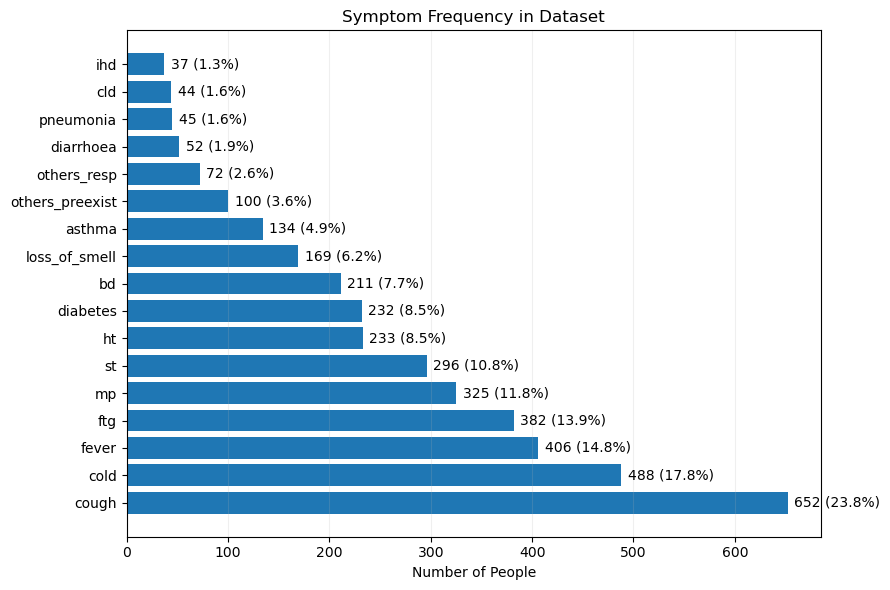

In [48]:
#Count number of people with each symptom (only value = 1)
symptom_counts = (df_encoded[symptom_cols] == 1).sum().sort_values(ascending=True)
symptom_pct = (symptom_counts / len(df_encoded) * 100).round(1)

#Plot symptom frequencies
plt.figure(figsize=(9, 6))
bars = plt.barh(symptom_counts.index, symptom_counts.values)
plt.title("Symptom Frequency in Dataset")
plt.xlabel("Number of People")
plt.grid(axis='x', alpha=0.2)

#Put most frequent symptoms at the top
plt.gca().invert_yaxis()

#Add count and % labels
for bar, cnt, pct in zip(bars, symptom_counts.values, symptom_pct.values):
   plt.text(bar.get_width() + max(symptom_counts)*0.01,  
            bar.get_y() + bar.get_height()/2,
            f"{int(cnt)} ({pct}%)",
            va='center')

plt.tight_layout()
plt.show()

### **Audio & Create DF with matched ID**

In [49]:
#Keep audio-related columns aside before encoding
audio_column = [c for c in df.columns if c.startswith("audio_") or c.startswith("quality_")]
 
#One-hot encode only categorical cols
df_encoded = pd.get_dummies(df.drop(columns=audio_column),
                           columns=['covid_status', 'l_c', 'smoker', 'test_status', 'testType'],
                           drop_first=False)
 
#Add back audio path columns
df_encoded[audio_column] = df[audio_column]

#Count IDs that have symptoms and at least one audio file
ids_with_audio = df_encoded.loc[df_encoded[audio_column].notna().any(axis=1), 'id'].unique()
print("IDs with symptoms + at least one audio:", len(ids_with_audio))

IDs with symptoms + at least one audio: 2744


In [50]:
#Collect feature column groups
audio_feature_cols = [c for c in df.columns if any(tok in c for tok in
   ['_mfcc_', '_zcr', '_centroid', '_rolloff', '_bandwidth', '_duration'])]

quality_cols = [c for c in df.columns if c.startswith('quality_')]

path_cols = [c for c in df.columns if c.startswith('audio_')]

#Re-attach audio paths and quality columns
df_encoded[path_cols + quality_cols] = df[path_cols + quality_cols]

#Re-check how many IDs have at least one audio path
ids_with_audio = df_encoded.loc[df_encoded[path_cols].notna().any(axis=1), 'id'].unique()
print("IDs with symptoms + at least one audio:", len(ids_with_audio))

#Merge audio features into the encoded dataset
full = df_encoded.merge(df[['id'] + audio_feature_cols], on='id', how='inner', suffixes=("", "_aud"))

IDs with symptoms + at least one audio: 2744


In [ ]:
#CSV features (symptoms)
csv_cols = symptom_sick 
X_csv = df_encoded[csv_cols]

#Audio features (mfcc, zcr etc)
X_audio = df_encoded[audio_feature_cols].astype(float)

#Target
#Run again df_encoded 
df_encoded['is_sick'] = (
    (df_encoded[symptom_sick] == 1).any(axis=1) |
    (df_encoded['test_status_Positive'] == 1)
).astype(int)

y = df_encoded['is_sick'].astype(int)

print("CSV:", X_csv.shape, "| Audio:", X_audio.shape, "| y:", y.shape)

CSV: (2744, 10) | Audio: (2744, 90) | y: (2744,)


### **SPLIT DATA**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#Split indices into train/test sets (stratified by target y)
idx_train, idx_test = train_test_split(
   df_encoded.index, test_size=0.30, random_state=42, stratify=y
)

#Use indices to split CSV features, audio features, and labels
X_csv_tr, X_csv_te = X_csv.loc[idx_train], X_csv.loc[idx_test]
X_audio_tr, X_audio_te = X_audio.loc[idx_train], X_audio.loc[idx_test]
y_tr, y_te = y.loc[idx_train], y.loc[idx_test]

#### **Scaling Audio**

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#Fit scaler on training audio features
scaler = StandardScaler().fit(X_audio_tr)

#Apply transformation to train/test audio sets
X_audio_tr_sc = scaler.transform(X_audio_tr)
X_audio_te_sc = scaler.transform(X_audio_te)

#Show resulting shapes for CSV and audio features
print("Train CSV:", X_csv_tr.shape, "| Train Audio:", X_audio_tr_sc.shape)
print("Test CSV:", X_csv_te.shape,  "| Test Audio:", X_audio_te_sc.shape)

Train CSV: (1920, 10) | Train Audio: (1920, 90)
Test CSV: (824, 10) | Test Audio: (824, 90)


### **MODEL TRAINING**

#### **Training model with CSV only**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [58]:
#Initialize Random Forest with balanced class weights
rf_csv = RandomForestClassifier(
   n_estimators=200,        #Number of trees
   max_depth=None,          #Expand nodes until all leaves are pure or min_samples reached
   random_state=42,
   class_weight="balanced"  #Handle class imbalance
)

#Fit on training set
rf_csv.fit(X_csv_tr, y_tr)

#Predict labels and probabilities on test set
y_pred = rf_csv.predict(X_csv_te)
y_prob = rf_csv.predict_proba(X_csv_te)[:, 1]

#Evaluate model performance on test set
print("Accuracy:", accuracy_score(y_te, y_pred))
print("F1-score:", f1_score(y_te, y_pred))
print("ROC-AUC:", roc_auc_score(y_te, y_prob))
print("\nClassification Report:\n", classification_report(y_te, y_pred))

Accuracy: 0.9526699029126213
F1-score: 0.9420505200594353
ROC-AUC: 0.9452247191011236

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       468
           1       1.00      0.89      0.94       356

    accuracy                           0.95       824
   macro avg       0.96      0.95      0.95       824
weighted avg       0.96      0.95      0.95       824



In [59]:
#Random Forest predictions
y_pred = rf_csv.predict(X_csv_te)

In [60]:
#Find False Negatives (true=1 but predicted=0)
false_negatives_idx = y_te[(y_te == 1) & (y_pred == 0)].index
false_negatives = full.loc[false_negatives_idx]

print("False Negatives:", len(false_negatives))
display(false_negatives.head(10)) 

False Negatives: 39


,id,a,record_date,g,asthma,cough,ht,cold,diabetes,diarrhoea,...,vowel-o_bandwidth_aud,breathing-deep_duration_aud,breathing-shallow_duration_aud,cough-heavy_duration_aud,cough-shallow_duration_aud,counting-fast_duration_aud,counting-normal_duration_aud,vowel-a_duration_aud,vowel-e_duration_aud,vowel-o_duration_aud
1912,RmWwhKI8kjPi5qN9H740rfm0jHA2,57,2021-07-07,1,-1,1,-1,1,-1,-1,...,1652.034040,19.114667,16.554667,5.034667,5.973333,12.373333,26.624000,2.645333,1.962667,1.706667
1930,gGgG540lBOZoSK1vyqNVlqBzQBl1,20,2021-07-12,0,-1,-1,-1,-1,-1,-1,...,5220.526205,12.458667,5.461333,3.413333,2.560000,5.632000,13.141333,6.485333,7.082667,6.656000
1754,S4RMw5HOdnaBnLOaIIuybMtreHg1,22,2021-05-29,0,-1,-1,-1,-1,-1,-1,...,1465.693265,10.154667,10.752000,3.328000,4.778667,9.130667,16.213333,7.082667,9.301333,8.704000
1620,kvrE8UiQfHO8R7NaadPtaHRLqtG3,21,2021-04-23,0,-1,-1,-1,-1,-1,-1,...,3871.235724,22.941315,12.538776,7.894785,5.665669,9.287982,15.139410,10.216780,10.216780,9.845261
2683,XgaNx3dH4DftejsL7GLYmBH9WKs2,26,2022-01-21,0,-1,-1,-1,-1,-1,-1,...,1067.229385,8.362667,5.034667,4.864000,4.181333,6.741333,13.824000,7.509333,4.608000,4.864000
1551,9jmKb1whQ0VGTqOaHvdOOr1oo6T2,27,2021-04-03,0,-1,1,-1,-1,-1,-1,...,749.086001,29.184000,7.850667,5.973333,5.632000,11.008000,21.674667,4.010667,4.522667,5.717333
2674,01GtHP1FUbXKdWEUwApFdusuO773,23,2022-01-27,1,1,-1,-1,-1,-1,-1,...,2761.493437,14.762667,8.533333,3.669333,2.560000,5.290667,11.605333,2.474667,2.560000,1.536000
1711,PkfBnCa4dFYuRjEZpsvTAerF2fS2,42,2021-05-22,0,-1,1,-1,-1,-1,-1,...,818.861599,25.344000,19.541333,10.922667,10.154667,7.765333,17.834667,7.594667,8.704000,7.936000
2023,IsIdeIoBfHQ8nzRoAi93NjpFij52,24,2021-07-27,0,-1,-1,-1,-1,-1,-1,...,3088.897187,17.647166,9.566621,5.665669,4.736871,7.801905,15.232290,6.037188,5.665669,5.758549
2384,YRn1xdEIHufqa6lRl35Lg1YUXoJ3,34,2022-01-20,0,-1,-1,-1,-1,-1,-1,...,0.000000,0.512000,0.597333,0.597333,0.597333,0.597333,0.682667,0.597333,0.682667,0.682667


                 count  fraction
cough               16  0.410256
cold                13  0.333333
fever               13  0.333333
ftg                  8  0.205128
st                   7  0.179487
bd                   7  0.179487
mp                   6  0.153846
ht                   3  0.076923
others_resp          3  0.076923
diarrhoea            3  0.076923
loss_of_smell        3  0.076923
others_preexist      2  0.051282
diabetes             2  0.051282
ihd                  1  0.025641
pneumonia            1  0.025641


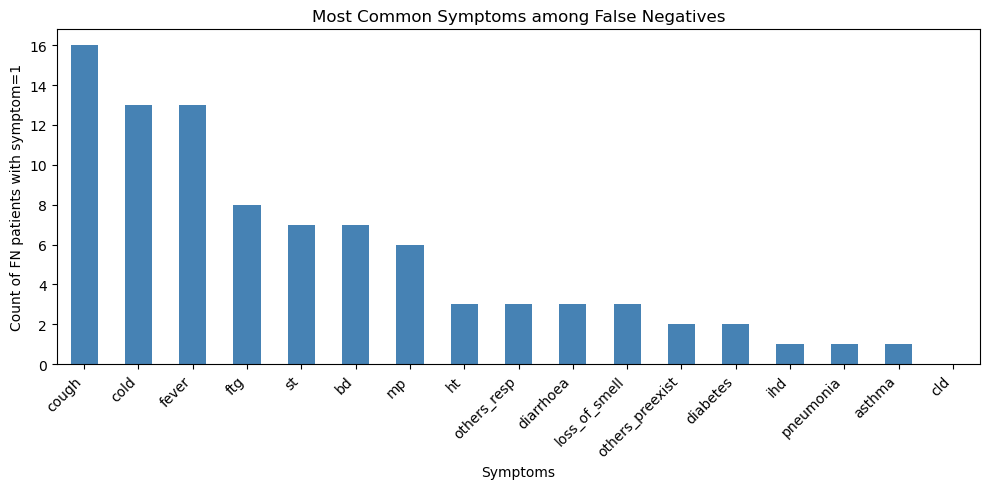

In [61]:
#Extract only symptom columns for FN cases
fn_symptoms = false_negatives[symptom_cols]

#Count how many patients have each symptom
symptom_counts = (fn_symptoms == 1).sum().sort_values(ascending=False)

#Fraction of FN patients with each symptom
symptom_fractions = (fn_symptoms == 1).mean().sort_values(ascending=False)

#Combine counts and fractions into summary table
symptom_summary = pd.DataFrame({
   "count": symptom_counts,
   "fraction": symptom_fractions
})

print(symptom_summary.head(15))

#Counts Barplot of most common FN symptoms
plt.figure(figsize=(10,5))
symptom_summary["count"].plot(kind="bar", color="steelblue")
plt.title("Most Common Symptoms among False Negatives")
plt.ylabel("Count of FN patients with symptom=1")
plt.xlabel("Symptoms")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### **Training model with audio only**

In [62]:
#Only audio features training
rf_audio = RandomForestClassifier(
   n_estimators=200,
   max_depth=None,
   random_state=42,
   class_weight="balanced"
)

rf_audio.fit(X_audio_tr_sc, y_tr)

#Predictions
y_pred_audio = rf_audio.predict(X_audio_te_sc)
y_prob_audio = rf_audio.predict_proba(X_audio_te_sc)[:, 1]

#Evaluation
print("Accuracy:", accuracy_score(y_te, y_pred_audio))
print("F1-score:", f1_score(y_te, y_pred_audio))
print("ROC-AUC:", roc_auc_score(y_te, y_prob_audio))
print("\nClassification Report:\n", classification_report(y_te, y_pred_audio))

Accuracy: 0.683252427184466
F1-score: 0.5492227979274611
ROC-AUC: 0.7403125900316913

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.76       468
           1       0.71      0.45      0.55       356

    accuracy                           0.68       824
   macro avg       0.69      0.65      0.65       824
weighted avg       0.69      0.68      0.67       824



In [63]:
#False Negatives
y_pred_audio = rf_audio.predict(X_audio_te_sc)
false_negatives_idx = y_te[(y_te == 1) & (y_pred_audio == 0)].index
false_negatives = full.loc[false_negatives_idx]

print("False Negatives:", len(false_negatives))

False Negatives: 197


               count  percentage
cough             67    0.340102
cold              56    0.284264
fever             46    0.233503
ftg               36    0.182741
mp                35    0.177665
st                30    0.152284
ht                25    0.126904
loss_of_smell     19    0.096447
bd                17    0.086294
asthma            14    0.071066


<Figure size 1000x600 with 0 Axes>

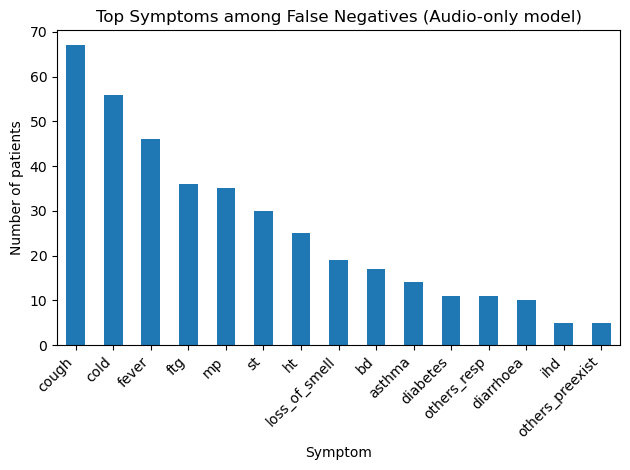

In [64]:
#Calculate symptom stats among False Negatives
#Percentages of FN patients with each symptom
fn_symptom_summary = {}
for col in symptom_cols:
   fn_symptom_summary[col] = (false_negatives[col] == 1).mean()  
fn_symptom_summary = pd.Series(fn_symptom_summary).sort_values(ascending=False)

#Absolute counts of FN patients with each symptom
fn_symptom_counts = {}
for col in symptom_cols:
   fn_symptom_counts[col] = (false_negatives[col] == 1).sum() 
fn_symptom_counts = pd.Series(fn_symptom_counts).sort_values(ascending=False)

#Combine to summary DataFrame
summary_df = pd.DataFrame({
   "count": fn_symptom_counts,
   "percentage": fn_symptom_summary
}).sort_values("count", ascending=False)

print(summary_df.head(10))

#Barplot of top symptoms by count
plt.figure(figsize=(10,6))
summary_df.head(15).plot(kind="bar", y="count", legend=False)
plt.title("Top Symptoms among False Negatives (Audio-only model)")
plt.ylabel("Number of patients")
plt.xlabel("Symptom")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### **Final training model with both CSV and audio**

In [65]:
#Combine CSV and audio features into single arrays
X_train_combined = np.hstack([X_csv_tr.values, X_audio_tr_sc])
X_test_combined  = np.hstack([X_csv_te.values, X_audio_te_sc])

print("Train:", X_train_combined.shape, "| Test:", X_test_combined.shape)

Train: (1920, 100) | Test: (824, 100)


In [66]:
#Binary classification (healthy vs sick)
rf_bin = RandomForestClassifier(
   n_estimators=300,       
   max_depth=None,         
   random_state=42,        
   class_weight="balanced" 
)

#Train on combined CSV + audio features
rf_bin.fit(X_train_combined, y_tr)

#Predictions on test set
y_pred_bin = rf_bin.predict(X_test_combined)

#Evaluation report
print("~~ Stage 1 (Binary) report ~~")
print(classification_report(y_te, y_pred_bin, target_names=["healthy","sick"]))

~~ Stage 1 (Binary) report ~~
              precision    recall  f1-score   support

     healthy       0.93      1.00      0.96       468
        sick       0.99      0.90      0.94       356

    accuracy                           0.95       824
   macro avg       0.96      0.95      0.95       824
weighted avg       0.96      0.95      0.95       824



In [68]:
#Build multiclass diagnosis labels
def label_diagnosis_merged(row):
   #Check for positive test or covid_status string
   test_positive = (row.get('test_status') == 'Positive') or (row.get('test_status_Positive', 0) == 1)
   covid_positive = isinstance(row.get('covid_status'), str) and row['covid_status'].lower().startswith('positive')

   if test_positive or covid_positive:
       return 'covid'
   elif row.get('asthma', 0) == 1:
       return 'asthma'
   elif row.get('pneumonia', 0) == 1:
       return 'pneumonia'
   elif row.get('cold', 0) == 1:
       return 'cold'
   elif row.get('others_resp', 0) == 1:
       return 'resp_other'
   else:
       return 'healthy'
   
#Apply diagnosis labeling
y_multi_name = df_encoded.apply(label_diagnosis_merged, axis=1)

#Define class order
preferred_order = ['healthy','covid','asthma','pneumonia','cold','resp_other']
class_names = [c for c in preferred_order if c in set(y_multi_name)]

#Map class names to IDs
name2id = {n:i for i,n in enumerate(class_names)}
y_multi = y_multi_name.map(name2id)

#Inspect class distribution
print("Classes:", class_names)
print("Distribution (of all the dataset):")
print(y_multi_name.value_counts())

#Align labels with train/test splits
y_multi_tr = y_multi.loc[X_csv_tr.index].values
y_multi_te = y_multi.loc[X_csv_te.index].values

Classes: ['healthy', 'covid', 'asthma', 'pneumonia', 'cold', 'resp_other']
Distribution (of all the dataset):
healthy       1752
covid          681
cold           174
asthma         108
pneumonia       15
resp_other      14
Name: count, dtype: int64


In [69]:
from sklearn.utils.class_weight import compute_sample_weight

In [70]:
base_w = compute_sample_weight(class_weight="balanced", y=y_tr)
alpha = 2.0
w = base_w * np.where(y_tr == 1, alpha, 1.0)

In [71]:
#Find healthy and sick IDs
#Train weighted Random Forest 
rf_bin2 = RandomForestClassifier(
   n_estimators=400,     
   max_depth=None,       
   min_samples_leaf=3,   #Minimum samples per leaf
   max_features="sqrt",  #Random subset of features for splits
   random_state=42,
   n_jobs=-1             #Use all CPU cores
)

#Fit with custom sample weights
rf_bin2.fit(X_train_combined, y_tr, sample_weight=w)

#Predicted probabilities for "sick" class (train/test)
p_sick_tr = rf_bin2.predict_proba(X_train_combined)[:, 1]
p_sick_te = rf_bin2.predict_proba(X_test_combined)[:, 1]

In [72]:
#Find best threshold for Stage-1 (binary classifier)
best = (-1.0, 0.50)

for thr in np.linspace(0.05, 0.95, 91):  
   #Convert probabilities to class predictions
   y_hat = (p_sick_te >= thr).astype(int)

   #Compute classification report
   rep = classification_report(y_te, y_hat, target_names=["healthy","sick"], output_dict=True, zero_division=0)

   score = rep["sick"]["f1-score"]       

   #Update best threshold if better
   if score > best[0]:
       best = (score, thr)

best_thr = best[1]
print(f"Chosen Stage-1 threshold: {best_thr:.3f} (criterion=SICK F1)")

Chosen Stage-1 threshold: 0.450 (criterion=SICK F1)


In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
#Final Stage-1 predictions using the tuned threshold
y_pred_bin_tr = (p_sick_tr >= best_thr).astype(int)
y_pred_bin_te = (p_sick_te >= best_thr).astype(int)


#Evaluation on test set
print("\n~~ Stage-1 report (binary, tuned threshold) ~~")
print(classification_report(y_te, y_pred_bin_te, target_names=["healthy","sick"], zero_division=0))

#Confusion matrix (rows=true labels, cols=predicted)
print("~~ Stage-1 confusion matrix [rows=true, cols=pred] ~~")
print(confusion_matrix(y_te, y_pred_bin_te, labels=[0, 1]))


~~ Stage-1 report (binary, tuned threshold) ~~
              precision    recall  f1-score   support

     healthy       0.93      0.98      0.96       468
        sick       0.97      0.91      0.94       356

    accuracy                           0.95       824
   macro avg       0.95      0.94      0.95       824
weighted avg       0.95      0.95      0.95       824

~~ Stage-1 confusion matrix [rows=true, cols=pred] ~~
[[457  11]
 [ 32 324]]


##### Stage-2: If someone is sick, what does he/she has?

In [75]:
#ID for "healthy" class
healthy_id = name2id['healthy']

#Initialize all predictions as healthy
y_pred_two_stage = np.full_like(y_multi_te, fill_value=healthy_id)

#Mask for cases predicted sick in Stage 1
sick_mask_te = (y_pred_bin_te == 1)  

#For sick cases, apply Stage 2 classifier
if sick_mask_te.any():
   y_stage2_pred = rf_bin2.predict(X_test_combined[sick_mask_te])
   y_pred_two_stage[sick_mask_te] = y_stage2_pred

#Evaluation report
print(f"\n~~ Two-stage overall report (Stage-1 threshold={best_thr:.2f}) ~~")
print(classification_report(y_multi_te, y_pred_two_stage, target_names=class_names, zero_division=0))

#Confusion matrix (rows=true labels, cols=predicted labels)
cm_two = confusion_matrix(y_multi_te, y_pred_two_stage, labels=list(range(len(class_names))))
print("~~ Two-stage confusion matrix [rows=true, cols=pred] ~~")
print(cm_two)


~~ Two-stage overall report (Stage-1 threshold=0.45) ~~
              precision    recall  f1-score   support

     healthy       0.93      0.88      0.90       526
       covid       0.57      0.84      0.68       219
      asthma       0.00      0.00      0.00        24
   pneumonia       0.00      0.00      0.00         5
        cold       0.00      0.00      0.00        48
  resp_other       0.00      0.00      0.00         2

    accuracy                           0.79       824
   macro avg       0.25      0.29      0.26       824
weighted avg       0.74      0.79      0.76       824

~~ Two-stage confusion matrix [rows=true, cols=pred] ~~
[[464  62   0   0   0   0]
 [ 34 185   0   0   0   0]
 [  3  21   0   0   0   0]
 [  0   5   0   0   0   0]
 [  0  48   0   0   0   0]
 [  0   2   0   0   0   0]]


In [76]:
#Keep only symptom columns that exist in false_negatives
symptom_cols = [c for c in symptom_cols if c in false_negatives.columns]

#If there are any false negatives, summarize their symptoms
if len(false_negatives) and symptom_cols:
   fn_symptom_counts = (false_negatives[symptom_cols] == 1).sum().sort_values(ascending=False)
   print("\nTop FN symptoms (counts):")
   print(fn_symptom_counts.head(10))


Top FN symptoms (counts):
cough            67
cold             56
fever            46
ftg              36
mp               35
st               30
ht               25
loss_of_smell    19
bd               17
asthma           14
dtype: int64


##### False Positives are the ones who are healthy, but are shown as sick [true=0 (healthy), predicted=1 (sick)]. 
##### False Negatives are the ones who are sick, but are shown as healthy [true=1 (sick), predicted=0 (healthy)].

In [77]:
#Identify false positives and false negatives
#Columns to display (ID + symptoms available in dataset)
cols_in_full = ["id"] + [c for c in symptom_cols if c in false_negatives.columns]

te_index = X_csv_te.index
y_true_te = np.asarray(y_te)
y_bin_te  = np.asarray(y_pred_bin_te)

fp_pos = np.where((y_true_te == 0) & (y_bin_te == 1))[0]
fp_idx = te_index[fp_pos]
cols_in_full = ["id"] + [c for c in symptom_cols if c in full.columns]
false_positives = full.loc[fp_idx, cols_in_full]

print("False Positives:", len(false_positives))
display(false_positives.head(15))

fn_pos = np.where((y_true_te == 1) & (y_bin_te == 0))[0]
fn_idx = te_index[fn_pos]
false_negatives = full.loc[fn_idx, cols_in_full]

print("False Negatives:", len(false_negatives))
display(false_negatives.head(15))

False Positives: 11


,id,asthma,cough,ht,cold,diabetes,diarrhoea,ihd,bd,st,fever,ftg,mp,loss_of_smell,cld,pneumonia,others_resp,others_preexist
1940,333NjqA1TfZJuICEdXSkPhVz0LA3,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
1317,xrVSOYVRn2RTVm7arbPJztWNCoI3,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
16,tiKv850hJFTmpCAvfJOmOOqkeUs1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1958,9ES7TwETrndwNvdJMCShXkXT7qw1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
179,CFwFsoyLtGUxPNPw5vMD7cznAnO2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1535,B8eucE77s9Tg8wfQCZIv9JCTDrj2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
930,W1c56dgBsoe34ilAX8vAZs8tNcX2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2106,mM5KRWXtilYLsOILvMB2WdRVVC53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2490,ItJda428lGefM787nRdA3EHDj7z1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1
1055,QjBZv868nydJzk0ZzwgKDHSG6Q82,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


False Negatives: 32


,id,asthma,cough,ht,cold,diabetes,diarrhoea,ihd,bd,st,fever,ftg,mp,loss_of_smell,cld,pneumonia,others_resp,others_preexist
1754,S4RMw5HOdnaBnLOaIIuybMtreHg1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1620,kvrE8UiQfHO8R7NaadPtaHRLqtG3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2683,XgaNx3dH4DftejsL7GLYmBH9WKs2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1551,9jmKb1whQ0VGTqOaHvdOOr1oo6T2,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
1711,PkfBnCa4dFYuRjEZpsvTAerF2fS2,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1
2406,6w5DhWgDAFW8TmKPEJWuvHrT6dp2,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1
2384,YRn1xdEIHufqa6lRl35Lg1YUXoJ3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1737,t0IcY0l4PcU8VicMlC1xC3taL2E2,-1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2098,aTSU2ShIvnMzIsWQo2OoiyLxIZl1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2051,JdSI3od4d4Ug8bkVyX2HWSC28fv1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,1,1


In [78]:
covid_cols = [c for c in df_encoded.columns if c.startswith("covid_status")]
 
#merge the false_negatives with covid_status columns
false_negatives_with_covid = false_negatives.merge(
    df_encoded[["id"] + covid_cols],
    on="id",
    how="left"
)
print("\ncovid_status Distribution for False Negatives:")
print(false_negatives_with_covid[covid_cols].sum())


covid_status Distribution for False Negatives:
covid_status_healthy                         8
covid_status_no_resp_illness_exposed         2
covid_status_positive_asymp                  1
covid_status_positive_mild                  10
covid_status_positive_moderate               6
covid_status_recovered_full                  3
covid_status_resp_illness_not_identified     2
covid_status_under_validation                0
dtype: int64


##### Last steps

In [79]:
#Fix Random Forest value
#Sick-only
sick_mask_tr = (y_tr == 1)
X_tr_stage2  = X_train_combined[sick_mask_tr]
y_tr_stage2  = y_multi_tr[sick_mask_tr]

#Keep only the disease classes (not healthy)
disease_only = [c for c in class_names if c != "healthy"]
disease_ids  = [name2id[c] for c in disease_only]

valid = np.isin(y_tr_stage2, disease_ids)
X_tr_stage2  = X_tr_stage2[valid]
y_tr_stage2  = y_tr_stage2[valid]

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [81]:
rf = RandomForestClassifier(
   class_weight="balanced",
   random_state=42,
   n_jobs=-1
)

param_dist = {
   "n_estimators": randint(300, 900),
   "max_depth": [None] + list(range(4, 31, 2)),
   "min_samples_split": randint(2, 12),
   "min_samples_leaf": randint(1, 6),
   "max_features": ["sqrt", "log2", None]
}

rs = RandomizedSearchCV(
   rf,
   param_distributions=param_dist,
   n_iter=40,           
   cv=3,                
   scoring="f1_macro",   #Multiclass-friendly
   random_state=42,
   n_jobs=-1,
   verbose=1
)

rs.fit(X_tr_stage2, y_tr_stage2)
rf_stage2_best = rs.best_estimator_
print("Best params:", rs.best_params_)


healthy_id = name2id["healthy"]

#y_pred_bin from Stage-1
y_pred_two_stage = np.full_like(y_multi_te, fill_value=healthy_id)

sick_mask_te = (y_pred_bin == 1)
if sick_mask_te.any():
   y_stage2_pred = rf_stage2_best.predict(X_test_combined[sick_mask_te])
   y_pred_two_stage[sick_mask_te] = y_stage2_pred

print("~~ Two-stage with RF(best) ~~")
print(classification_report(y_multi_te, y_pred_two_stage, target_names=class_names))
print(confusion_matrix(y_multi_te, y_pred_two_stage, labels=list(range(len(class_names)))))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 506}
~~ Two-stage with RF(best) ~~
              precision    recall  f1-score   support

     healthy       0.93      0.89      0.91       526
       covid       0.61      0.61      0.61       219
      asthma       0.69      1.00      0.81        24
   pneumonia       0.33      0.40      0.36         5
        cold       0.46      0.56      0.50        48
  resp_other       0.00      0.00      0.00         2

    accuracy                           0.79       824
   macro avg       0.50      0.58      0.53       824
weighted avg       0.80      0.79      0.80       824

[[466  60   0   0   0   0]
 [ 37 134  11   4  32   1]
 [  0   0  24   0   0   0]
 [  0   3   0   2   0   0]
 [  0  21   0   0  27   0]
 [  0   2   0   0   0   0]]


##### Check on our model if something changes using test_status column. 

In [82]:
#Include test_status dummies in feature set

#Collect one-hot encoded columns for test_status
test_dum_cols = [c for c in df_encoded.columns if c.startswith("test_status_")]
print("test_status dummies:", test_dum_cols)

#Extend CSV feature set with test_status dummies
X_csv_plus = pd.concat([X_csv, df_encoded[test_dum_cols]], axis=1)

#Keep same train/test split indices for fair comparison
X_csv_tr_plus = X_csv_plus.loc[idx_train]
X_csv_te_plus = X_csv_plus.loc[idx_test]

#Combine CSV+audio features
X_train_combined_plus = np.hstack([X_csv_tr_plus.values, X_audio_tr_sc])
X_test_combined_plus  = np.hstack([X_csv_te_plus.values,  X_audio_te_sc])

print("Main Model + test_status shapes ->",
     "Train:", X_train_combined_plus.shape, "| Test:", X_test_combined_plus.shape)

rf_bin_ts = RandomForestClassifier(
   n_estimators=400, max_depth=None, class_weight="balanced",
   min_samples_leaf=3, max_features="sqrt", random_state=42, n_jobs=-1
)
rf_bin_ts.fit(X_train_combined_plus, y_tr)

#Evaluate on test set
y_pred_bin_ts = rf_bin_ts.predict(X_test_combined_plus)
print("~~ Stage-1 (with test_status in X) ~~")
print(classification_report(y_te, y_pred_bin_ts, target_names=["healthy","sick"]))

test_status dummies: ['test_status_Negative', 'test_status_Not taken Test', 'test_status_Positive', 'test_status_Unknown']
Main Model + test_status shapes -> Train: (1920, 104) | Test: (824, 104)
~~ Stage-1 (with test_status in X) ~~
              precision    recall  f1-score   support

     healthy       1.00      0.99      0.99       468
        sick       0.99      0.99      0.99       356

    accuracy                           0.99       824
   macro avg       0.99      0.99      0.99       824
weighted avg       0.99      0.99      0.99       824



In [83]:
#Compare false positives/negatives with previous model
fp_idx_ts = y_te[(y_te == 0) & (y_pred_bin_ts == 1)].index
fn_idx_ts = y_te[(y_te == 1) & (y_pred_bin_ts == 0)].index

ts_cols    = [c for c in full.columns if c.startswith("test_status_")]
covid_cols = [c for c in full.columns if c.startswith("covid_status_")]

print("FP:", len(fp_idx_ts))
display(full.loc[fp_idx_ts, ["id"] + ts_cols ].head(10))
display(full.loc[fp_idx_ts, ["id"] + covid_cols].head(10))

print("FN:", len(fn_idx_ts))
display(full.loc[fn_idx_ts, ["id"] + ts_cols ].head(10))
display(full.loc[fn_idx_ts, ["id"] + covid_cols].head(10))

FP: 3


,id,test_status_Negative,test_status_Not taken Test,test_status_Positive,test_status_Unknown
1535,B8eucE77s9Tg8wfQCZIv9JCTDrj2,False,True,False,False
1565,Lf4G1rx8lufXdBBwEZnD4INFtUt2,True,False,False,False
1830,ADUIall6exYvek5ktU2P6pHWnza2,False,False,True,False


,id,covid_status_healthy,covid_status_no_resp_illness_exposed,covid_status_positive_asymp,covid_status_positive_mild,covid_status_positive_moderate,covid_status_recovered_full,covid_status_resp_illness_not_identified,covid_status_under_validation
1535,B8eucE77s9Tg8wfQCZIv9JCTDrj2,True,False,False,False,False,False,False,False
1565,Lf4G1rx8lufXdBBwEZnD4INFtUt2,False,True,False,False,False,False,False,False
1830,ADUIall6exYvek5ktU2P6pHWnza2,False,False,False,False,True,False,False,False


FN: 2


,id,test_status_Negative,test_status_Not taken Test,test_status_Positive,test_status_Unknown
1099,6pXKrZlDycStXTNMBjGXtxxYfvc2,False,True,False,False
1762,ottC8aetxhRQfKD00RCJc5LWS622,False,False,True,False


,id,covid_status_healthy,covid_status_no_resp_illness_exposed,covid_status_positive_asymp,covid_status_positive_mild,covid_status_positive_moderate,covid_status_recovered_full,covid_status_resp_illness_not_identified,covid_status_under_validation
1099,6pXKrZlDycStXTNMBjGXtxxYfvc2,True,False,False,False,False,False,False,False
1762,ottC8aetxhRQfKD00RCJc5LWS622,False,False,False,True,False,False,False,False


### **SAVE TRAINED MODELS AND ARTIFACTS**

In [88]:
from pathlib import Path
import pandas as pd
import joblib
import json

In [89]:
OUT = Path(r"C:/Machine Learning Assignment/Datasets 2")
OUT.mkdir(parents=True, exist_ok=True)

#Keep only numeric audio/quality columns
audio_numeric = list(full[audio_column].select_dtypes(include=["number"]).columns)

#Save the preprocessed table & original index
full.to_parquet(OUT / "full.parquet")
np.save(OUT / "full_index.npy", full.index.values)

#Save splits
np.save(OUT / "train_indices.npy", np.asarray(idx_train))
np.save(OUT / "test_indices.npy",  np.asarray(idx_test))

#Save models & audio scaler
joblib.dump(rf_bin2,      OUT / "rf_bin2.joblib")
joblib.dump(rf_stage2_best,    OUT / "rf_stage2_best.joblib")
joblib.dump(scaler, OUT / "scaler_audio.joblib")

#Save metadata (including the numeric audio cols used)
(OUT / "csv_feature_names.json").write_text(json.dumps(csv_cols, ensure_ascii=False, indent=2), encoding="utf-8")
(OUT / "audio_feature_names.json").write_text(json.dumps(audio_numeric, ensure_ascii=False, indent=2), encoding="utf-8")
(OUT / "class_names.json").write_text(json.dumps(class_names, ensure_ascii=False, indent=2), encoding="utf-8")
(OUT / "name2id.json").write_text(json.dumps(name2id, ensure_ascii=False, indent=2), encoding="utf-8")
(OUT / "stage1_threshold.json").write_text(json.dumps({"best_thr": float(best_thr)}, indent=2))

print("[OK] Saved artifacts to:", OUT)


[OK] Saved artifacts to: C:\Machine Learning Assignment\Datasets 2
